# Setup

In [1]:
!pip install torch torchvision pandas scikit-learn requests -q gdown


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 17.8 MB/s eta 0:00:00


In [2]:
import gdown
import os
import torch
import sys
from torchvision import transforms
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from torchvision.models import resnet18
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
import random
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
os.makedirs("TML_A1_21")

In [4]:
%cd TML_A1_21

/content/TML_A1_21


In [5]:
file_id = "1b71CfqYznX7pZi43iyUU-o636BgJvfnP"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "01_MIA.pt", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1b71CfqYznX7pZi43iyUU-o636BgJvfnP
From (redirected): https://drive.google.com/uc?id=1b71CfqYznX7pZi43iyUU-o636BgJvfnP&confirm=t&uuid=e77a2364-cc5a-4d4d-948e-31009ae3f2ae
To: /content/TML_A1_21/01_MIA.pt
100%|██████████| 44.9M/44.9M [00:01<00:00, 31.8MB/s]


'01_MIA.pt'

In [6]:
file_id = "109AFYCmB2UvaARzyNy0h_6k_b-RjdSnR"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "pub.pt", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=109AFYCmB2UvaARzyNy0h_6k_b-RjdSnR
From (redirected): https://drive.google.com/uc?id=109AFYCmB2UvaARzyNy0h_6k_b-RjdSnR&confirm=t&uuid=572c7837-2ff2-4735-aced-a17b7b929ac5
To: /content/TML_A1_21/pub.pt
100%|██████████| 250M/250M [00:03<00:00, 73.7MB/s]


'pub.pt'

In [7]:
file_id = "17azGFka5zDysFCGwlK5h52FrNmrpLqJM"  # replace with your real file ID
gdown.download(f"https://drive.google.com/uc?id={file_id}", "priv_out.pt", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=17azGFka5zDysFCGwlK5h52FrNmrpLqJM
From (redirected): https://drive.google.com/uc?id=17azGFka5zDysFCGwlK5h52FrNmrpLqJM&confirm=t&uuid=78fe8e74-470b-4aea-ac3a-66bc0fb623cd
To: /content/TML_A1_21/priv_out.pt
100%|██████████| 251M/251M [00:02<00:00, 115MB/s]


'priv_out.pt'

In [8]:
!ls

01_MIA.pt  priv_out.pt	pub.pt


### assignment1_template.py - File copied here

In [9]:
import torch
from torch.utils.data import Dataset
from typing import Tuple
import numpy as np
import requests
import pandas as pd

#### LOADING THE MODEL

from torchvision.models import resnet18

### Add this as a transofrmation to pre-process the images
mean = [0.2980, 0.2962, 0.2987]
std = [0.2886, 0.2875, 0.2889]

model = resnet18(pretrained=False)
model.fc = torch.nn.Linear(512, 44)

ckpt = torch.load("./01_MIA.pt", map_location="cpu")

model.load_state_dict(ckpt)

#### DATASETS

class TaskDataset(Dataset):
    def __init__(self, transform=None):

        self.ids = []
        self.imgs = []
        self.labels = []

        self.transform = transform

    def __getitem__(self, index) -> Tuple[int, torch.Tensor, int]:
        id_ = self.ids[index]
        img = self.imgs[index]
        if not self.transform is None:
            img = self.transform(img)
        label = self.labels[index]
        return id_, img, label

    def __len__(self):
        return len(self.ids)


class MembershipDataset(TaskDataset):
    def __init__(self, transform=None):
        super().__init__(transform)
        self.membership = []

    def __getitem__(self, index) -> Tuple[int, torch.Tensor, int, int]:
        id_, img, label = super().__getitem__(index)
        return id_, img, label, self.membership[index]

import torch.serialization
torch.serialization.add_safe_globals({'MembershipDataset': MembershipDataset})
torch.serialization.add_safe_globals({'TaskDataset': TaskDataset})

# Load the data again
data: MembershipDataset = torch.load("priv_out.pt", weights_only=False, map_location='cpu')

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [10]:
#Load the datasets
pub_data = torch.load("pub.pt", weights_only=False)
priv_data = torch.load("priv_out.pt", weights_only=False)

In [11]:
print(type(pub_data))
print(dir(pub_data))

<class '__main__.MembershipDataset'>
['__add__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_is_protocol', 'ids', 'imgs', 'labels', 'membership', 'transform']


In [12]:
#Check the Data format
sample = pub_data[1]
print(len(sample), type(sample))
print("Sample content:", sample)

4 <class 'tuple'>
Sample content: (304247, tensor([[[0.0118, 0.0196, 0.0235,  ..., 0.0627, 0.0588, 0.0588],
         [0.0157, 0.0235, 0.0275,  ..., 0.0588, 0.0549, 0.0431],
         [0.0196, 0.0196, 0.0196,  ..., 0.0431, 0.0471, 0.0431],
         ...,
         [0.0118, 0.0039, 0.0078,  ..., 0.0314, 0.0353, 0.0314],
         [0.0039, 0.0039, 0.0078,  ..., 0.0353, 0.0353, 0.0353],
         [0.0039, 0.0078, 0.0118,  ..., 0.0431, 0.0392, 0.0431]],

        [[0.0118, 0.0196, 0.0235,  ..., 0.0627, 0.0588, 0.0588],
         [0.0157, 0.0235, 0.0275,  ..., 0.0588, 0.0549, 0.0431],
         [0.0196, 0.0196, 0.0196,  ..., 0.0431, 0.0471, 0.0431],
         ...,
         [0.0118, 0.0039, 0.0078,  ..., 0.0314, 0.0353, 0.0314],
         [0.0039, 0.0039, 0.0078,  ..., 0.0353, 0.0353, 0.0353],
         [0.0039, 0.0078, 0.0118,  ..., 0.0431, 0.0392, 0.0431]],

        [[0.0118, 0.0196, 0.0235,  ..., 0.0627, 0.0588, 0.0588],
         [0.0157, 0.0235, 0.0275,  ..., 0.0588, 0.0549, 0.0431],
         [0.019

In [13]:
normalize = transforms.Normalize(mean=mean, std=std)

In [14]:
#TO use the last-secoond layer for internal features

class FeatureExtractor(nn.Module):
  def __init__(self, model):
    super().__init__()
    self.features = nn.Sequential(*list(model.children())[:-1])  # All except final fc
    self.fc = model.fc

  def forward(self, x):
    x = self.features(x)          # (batch, 512, 1, 1)
    x_flat = torch.flatten(x, 1)  # (batch, 512)
    logits = self.fc(x_flat)
    return logits, x_flat


model = resnet18(pretrained=False)
model.fc = torch.nn.Linear(512, 44)
model.load_state_dict(torch.load("01_MIA.pt", map_location="cpu"))
model = FeatureExtractor(model)
model.eval()

FeatureExtractor(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [15]:
def extract_features(model, dataset, normalize_fn, is_private=False, member_mean_vec=None, nonmember_mean_vec=None):
  model.eval()
  engineered_features, deep_features, labels, ids, all_logits = [], [], [], [], []

  for i in range(len(dataset)):
    data = dataset[i]

    # Use based on membership is known (public) or unknown (private)
    if is_private:
      id_, img, class_label = data[:3]
      member = -1
    else:
      id_, img, class_label, member = data[:4]

    img = normalize_fn(img).unsqueeze(0)
    label_tensor = torch.tensor([class_label])

    with torch.no_grad():
      # Model output and deep feature embedding
      logits, deep_feat = model(img)
      probs = F.softmax(logits, dim=1)

      # max probability
      confidence = torch.max(probs).item()

      # CE Loss
      loss = F.cross_entropy(logits, label_tensor).item()

      # Prob margin
      margin = (probs[0].topk(2).values[0] - probs[0].topk(2).values[1]).item()

      # Entropy
      entropy = -torch.sum(probs * torch.log(probs + 1e-12)).item()

      predicted_class = torch.argmax(probs, dim=1).item()
      correct = int(predicted_class == class_label)

      true_class_prob = probs[0, class_label].item()

      # Rank of true class
      class_rank = (probs[0] > true_class_prob).sum().item() + 1

      # Inverse rank (RMIA score)
      rmia_score = 1.0 / class_rank

      topk_probs = torch.topk(probs[0], k=3).values
      # Top-3 entropy
      top3_entropy = -torch.sum(topk_probs * torch.log(topk_probs + 1e-12)).item()

      top2_logits = torch.topk(logits[0], k=2).values
      logit_margin = (top2_logits[0] - top2_logits[1]).item()
      true_class_logit = logits[0, class_label].item()

      mean_other_logits = (logits[0].sum() - true_class_logit) / (logits.size(1) - 1)

      # Difference from mean of other logits
      logit_diff_mean = true_class_logit - mean_other_logits

      # Norm of logits vector
      logits_norm = torch.norm(logits).item()
      prob_variance = torch.var(probs).item()
      logit_ratio = top2_logits[0].item() / (top2_logits[1].item() + 1e-6)

      deep_feat_np = deep_feat.squeeze().numpy()
      logits_np = logits.squeeze().numpy()

    # Cosine similarity to member/non-member mean embeddings
    if member_mean_vec is not None and nonmember_mean_vec is not None:
      cos_sim_member = cosine_similarity(deep_feat_np.reshape(1, -1), member_mean_vec).item()
      cos_sim_non = cosine_similarity(deep_feat_np.reshape(1, -1), nonmember_mean_vec).item()
      cos_diff = cos_sim_member - cos_sim_non
    else:
      cos_sim_member = cos_sim_non = cos_diff = 0.0

    # Combine all engineered features
    engineered = [
      confidence, loss, margin, entropy, correct,
      class_rank, top3_entropy, logit_margin, true_class_logit,
      logit_diff_mean, logits_norm, prob_variance, logit_ratio,
      rmia_score,
      cos_sim_member, cos_sim_non, cos_diff
    ]

    # Append to results
    engineered_features.append(engineered)
    deep_features.append(deep_feat_np)
    all_logits.append(logits_np)
    labels.append(member)
    ids.append(id_)

  return (
      np.array(engineered_features),
      np.array(deep_features),
      np.array(all_logits),
      np.array(labels),
      ids)


In [16]:
# Extract features from the public dataset

X_pub_eng, X_pub_deep, X_pub_logits, y_pub, _ = extract_features(model, pub_data, normalize, is_private=False)

# Separate deep feature vectors for known members and non-members in the public dataset
member_deep = X_pub_deep[y_pub == 1]
nonmember_deep = X_pub_deep[y_pub == 0]

mean_member_vec = member_deep.mean(axis=0, keepdims=True)
mean_nonmember_vec = nonmember_deep.mean(axis=0, keepdims=True)

In [17]:
# Including cosine similarity

X_pub_eng, X_pub_deep, X_pub_logits, y_pub, _ = extract_features(model, pub_data, normalize, is_private=False, member_mean_vec=mean_member_vec, nonmember_mean_vec=mean_nonmember_vec)

X_priv_eng, X_priv_deep, X_priv_logits, _, priv_ids = extract_features(model, priv_data, normalize, is_private=True, member_mean_vec=mean_member_vec, nonmember_mean_vec=mean_nonmember_vec)

In [18]:
# Apply PCA to reduce the dimensionality of the deep features (from 512 to 64)

pca = PCA(n_components=64, random_state=42)
X_pub_pca = pca.fit_transform(X_pub_deep)
X_priv_pca = pca.transform(X_priv_deep)

X_pub_final = np.concatenate([X_pub_eng, X_pub_pca, X_pub_logits], axis=1)
X_priv_final = np.concatenate([X_priv_eng, X_priv_pca, X_priv_logits], axis=1)

In [19]:
# XGBoost classifier with tuned hyperparameters

xgb_clf = XGBClassifier(
  n_estimators=500,
  max_depth=3,
  learning_rate=0.03,
  subsample=0.8,
  colsample_bytree=0.7,
  gamma=2,
  reg_alpha=1,
  reg_lambda=1,
  eval_metric='logloss',
  random_state=42
)

In [20]:
xgb_clf.fit(X_pub_final, y_pub)

# Predict private scores
membership_scores = xgb_clf.predict_proba(X_priv_final)[:, 1]

# Normalize to [0, 1]
scaler = MinMaxScaler()
membership_scores_xgb = scaler.fit_transform(membership_scores.reshape(-1, 1)).flatten()


In [21]:
# Submission

df = pd.DataFrame(
  {
    "ids": data.ids,
    "score": membership_scores_xgb,
  }
)
df.to_csv("test.csv", index=None)
response = requests.post("http://34.122.51.94:9090/mia", files={"file": open("test.csv", "rb")}, headers={"token": "53077688"})
print(response.json())


{'TPR@FPR=0.05': 0.13133333333333333, 'AUC': 0.6622281111111112}


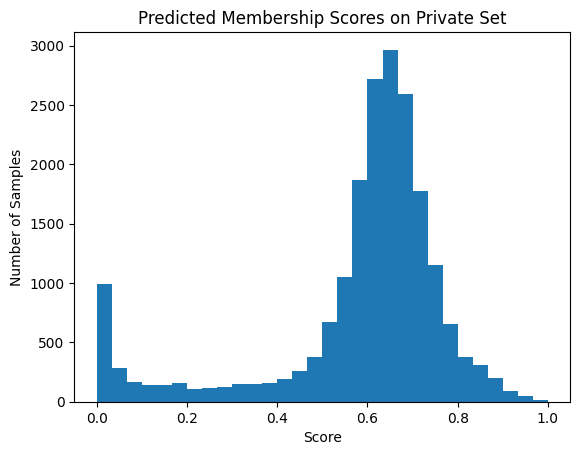

In [22]:
plt.hist(membership_scores_xgb, bins=30)
plt.title("Predicted Membership Scores on Private Set")
plt.xlabel("Score")
plt.ylabel("Number of Samples")
plt.show()

##Validation

In [23]:
# Split public data into training and validation sets
member_indices = [i for i in range(len(pub_data)) if pub_data[i][3] == 1]
nonmember_indices = [i for i in range(len(pub_data)) if pub_data[i][3] == 0]

random.shuffle(member_indices)
random.shuffle(nonmember_indices)

n_val = 8000
train_mem = member_indices[:n_val]
train_non = nonmember_indices[:n_val]

val_mem = member_indices[n_val:]
val_non = nonmember_indices[n_val:]


train_indices = train_mem + train_non
val_indices = val_mem + val_non
y_val = np.array([1]*len(val_mem) + [0]*len(val_non))


In [24]:
assert set(train_indices).isdisjoint(set(val_indices)), "⚠️ Overlap in train/val sets!"

In [25]:
# Extract once from all of pub_data to get member/nonmember embeddings
_, all_deep, _, all_labels, _ = extract_features(model, pub_data, normalize)

member_vec = all_deep[all_labels == 1].mean(axis=0, keepdims=True)
nonmember_vec = all_deep[all_labels == 0].mean(axis=0, keepdims=True)


In [26]:
from torch.utils.data import Subset

# Subsets
train_subset = Subset(pub_data, train_indices)
val_subset = Subset(pub_data, val_indices)

# Feature extraction (with cosine sim + logits)
X_train_eng, X_train_deep, X_train_logits, y_train, _ = extract_features(model, train_subset, normalize, member_mean_vec=member_vec, nonmember_mean_vec=nonmember_vec)

X_val_eng, X_val_deep, X_val_logits, y_val, _ = extract_features(model, val_subset, normalize, member_mean_vec=member_vec, nonmember_mean_vec=nonmember_vec)

In [27]:
pca = PCA(n_components=64, random_state=42)
X_train_pca = pca.fit_transform(X_train_deep)
X_val_pca = pca.transform(X_val_deep)


In [28]:
X_train_final = np.concatenate([X_train_eng, X_train_pca, X_train_logits], axis=1)
X_val_final = np.concatenate([X_val_eng, X_val_pca, X_val_logits], axis=1)


In [29]:
xgb_clf.fit(X_train_final, y_train)
val_scores = xgb_clf.predict_proba(X_val_final)[:, 1]

In [30]:

fpr, tpr, _ = roc_curve(y_val, val_scores)
tpr_at_fpr_005 = max([t for f, t in zip(fpr, tpr) if f <= 0.05])
auc = roc_auc_score(y_val, val_scores)

print(f"Validation — AUC: {auc:.4f}, TPR@FPR=0.05: {tpr_at_fpr_005:.4f}")


Validation — AUC: 0.6683, TPR@FPR=0.05: 0.1385
